In [1]:
from plotting_scripts import *


In [2]:
pream = "../2D/th"
problems = ['ldc2d', 'bfs2d']

#  hMG

In [6]:
hmg_data =  {}

for problem in problems:
    hmg_problem =  {}

    for nu in [2,3]: #,4]:
        path    = f'{pream}/hmg/{problem}/parallel_p8/V{nu}/results.pkl'
        name    = r'$V^{(\nu_h=%s)}_{h\textnormal{MG}}$' % rf'{nu}'
        
        hmg = get_frame(f'{path}')
        hmg = hmg[hmg['order'] != 2]
        hmg = hmg.reset_index(drop=True)
        hmg_problem[name] = hmg

    hmg_data[problem] = hmg_problem


# phMG(direct)

In [8]:
phmg_direct_data =  {}

for problem in problems[:]:
    phmg_data =  {}

    for h_cycles in range(1,3):
        for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), (3,3)]:
            path    = f'{pream}/phmg/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
            phmg = get_frame(f'{path}')
            phmg = phmg.reset_index(drop=True)
            if p_sweeps == h_sweeps:
                name = r'$V^{%s}_{ph\textnormal{MG(direct)}}$' % rf'(n_V={h_cycles},\nu_p=\nu_h={h_sweeps})'
            else:
                name = r'$V^{%s}_{ph\textnormal{MG(direct)}}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h={h_sweeps})'
            
            phmg_data[name] = phmg

    phmg_direct_data[problem] = phmg_data


# phMG(gradual)

In [10]:
phmg_grad_data =  {}

for problem in problems:
    phmg_data =  {}

    for h_cycles in range(1,3):
        for p_sweeps, h_sweeps in [(2,2), (2,3), (3,2), (3,3)]:
            path    = f'{pream}/phmg_grad/{problem}/parallel_p8/V{h_cycles}_p{p_sweeps}_h{h_sweeps}/results.pkl'
            phmg = get_frame(f'{path}')
            phmg = phmg.reset_index(drop=True)
            #hmg = hmg[hmg['ref'] == 4]
            if p_sweeps == h_sweeps:
                name = r'$V^{%s}_{ph\textnormal{MG(gradual)}}$' % rf'(n_V={h_cycles},\nu_p=\nu_h={h_sweeps})'
            else:
                name = r'$V^{%s}_{ph\textnormal{MG(gradual)}}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h={h_sweeps})'
            
            phmg_data[name] = phmg

    phmg_grad_data[problem] = phmg_data


# All data

Relative cost per run
Name                                                       : k>=5   | k>2   
$V^{(n_V=1,\nu_p=2,\nu_h=3)}_{ph\textnormal{MG(direct)}}$  : 1327.22 | 3284.88
$V^{(n_V=2,\nu_p=\nu_h=2)}_{ph\textnormal{MG(gradual)}}$   : 1560.50 | 3526.73
$V^{(n_V=1,\nu_p=2,\nu_h=3)}_{ph\textnormal{MG(gradual)}}$ : 1578.34 | 3537.47
$V^{(n_V=2,\nu_p=\nu_h=2)}_{ph\textnormal{MG(direct)}}$    : 1719.50 | 3715.92
$V^{(\nu_h=2)}_{h\textnormal{MG}}$                         : 2112.16 | 3858.35
Relative cost per iteration
Name                                                       : k>=5   | k>2   
$V^{(n_V=1,\nu_p=2,\nu_h=3)}_{ph\textnormal{MG(direct)}}$  : 1327.22 | 3284.88
$V^{(n_V=2,\nu_p=\nu_h=2)}_{ph\textnormal{MG(gradual)}}$   : 1560.50 | 3526.73
$V^{(n_V=1,\nu_p=2,\nu_h=3)}_{ph\textnormal{MG(gradual)}}$ : 1578.34 | 3537.47
$V^{(n_V=2,\nu_p=\nu_h=2)}_{ph\textnormal{MG(direct)}}$    : 1719.50 | 3715.92
$V^{(\nu_h=2)}_{h\textnormal{MG}}$                         : 2112.16 | 3858.35
Relati

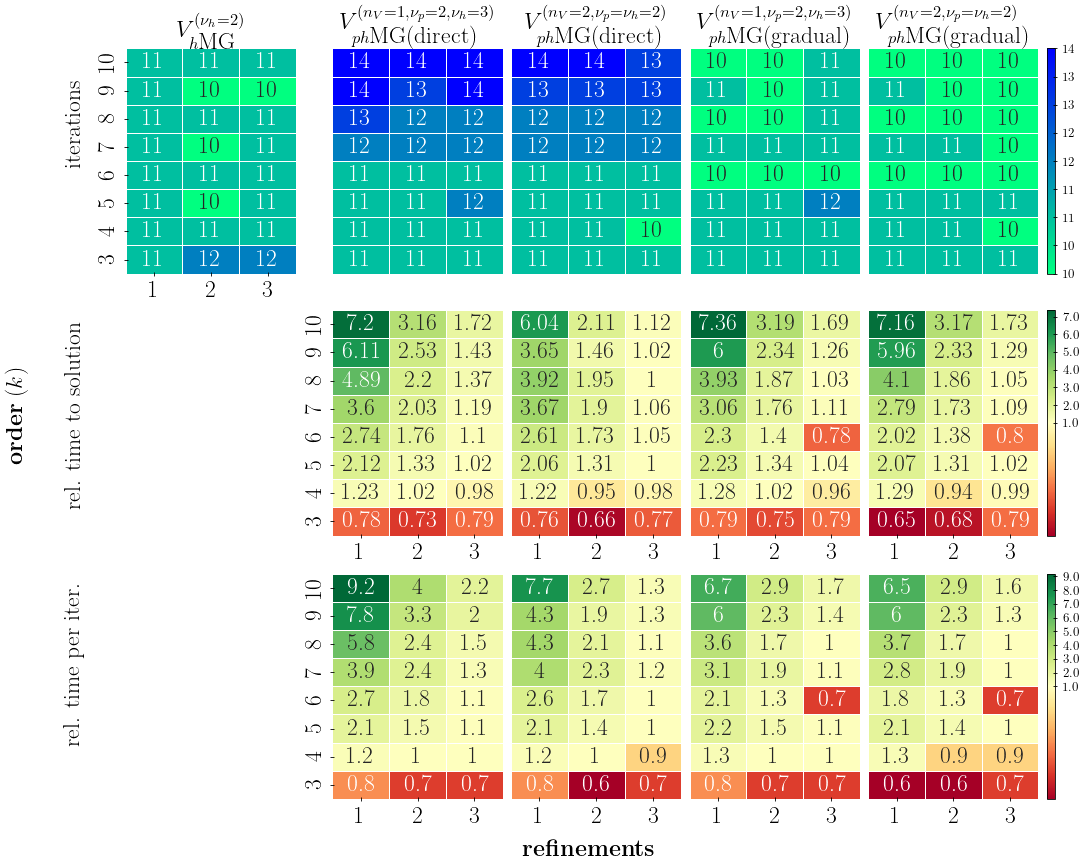

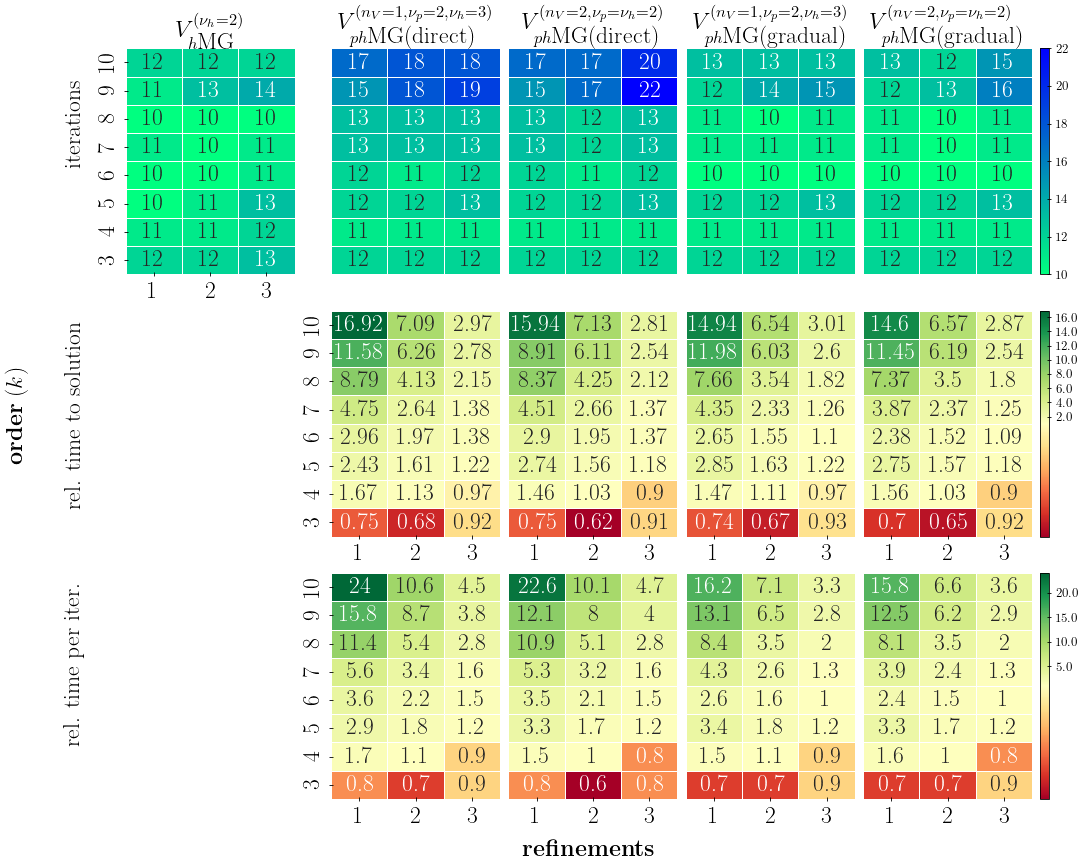

In [11]:

combined_data = {}

for problem in problems:
    data = {}
    
    for idata, grab in zip([hmg_data[problem], 
                            phmg_direct_data[problem],  phmg_direct_data[problem], 
                            phmg_grad_data[problem], phmg_grad_data[problem]],
                           [r'\nu_h=2',  
                            r'(n_V=1,\nu_p=2,\nu_h=3)', r'(n_V=2,\nu_p=\nu_h=2)', 
                            r'(n_V=1,\nu_p=2,\nu_h=3)', r'(n_V=2,\nu_p=\nu_h=2)'
                           ]
                          ):
        for k,v in idata.items():
            if grab in k:
                data[k] = v
    
    pdf_pream = f"th_{problem}" 
    
    plot_all(data, save_name=f"th_{problem}", warm=False)
    combined_data[problem] = data

/Users/alexey/papers/paper-phMG-stokes/phmg/data/plot_data/bar_table.py:230: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


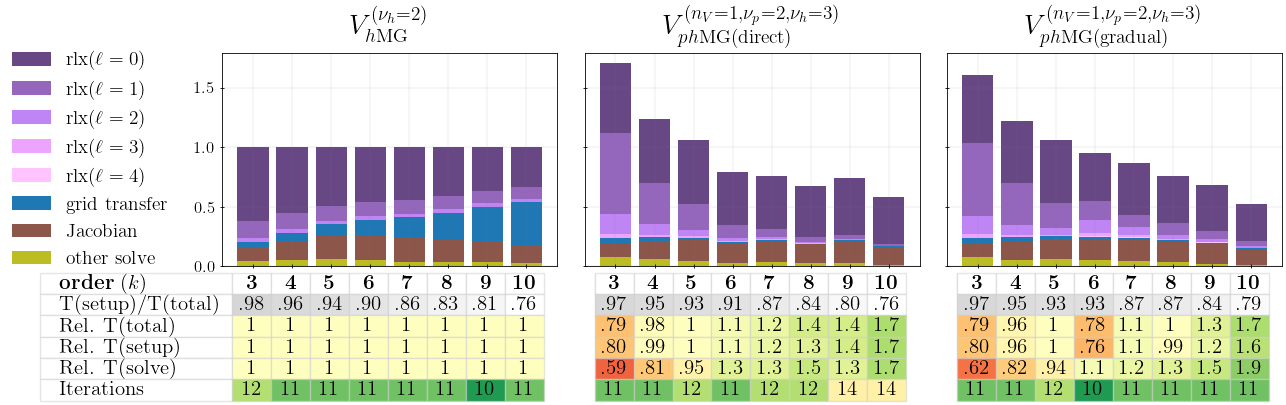

/Users/alexey/papers/paper-phMG-stokes/phmg/data/plot_data/bar_table.py:230: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


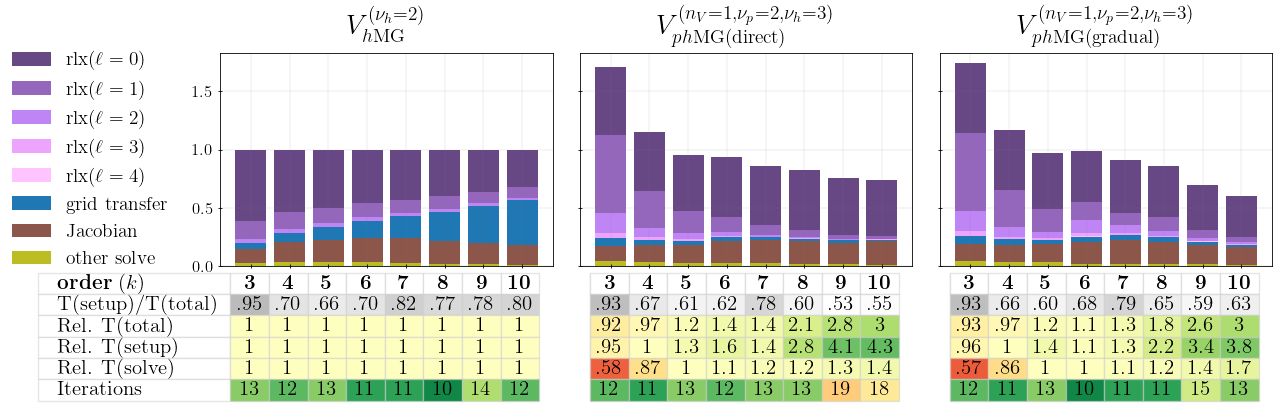

In [12]:
from bar_table import plot_fraction

    
ref = 3
names_all = [r'$V^{(\nu_h=2)}_{h\textnormal{MG}}$', 
             r'$V^{(n_V=1,\nu_p=2,\nu_h=3)}_{ph\textnormal{MG(direct)}}$', 
             r'$V^{(n_V=1,\nu_p=2,\nu_h=3)}_{ph\textnormal{MG(gradual)}}$']


for msh_type, data in combined_data.items():
    data_dict = {}
    for name in names_all:
        tmp = data[name]
        data_dict[name] = tmp[tmp['ref'] == ref]
    
    tmp = plot_fraction(data_dict, f"th_{msh_type}_ref{ref}", th_disc=False)
    #break